# Project 1 - EECS 731
*By Grant Gollier*

## Datasets

- US Hostpials: https://hifld-geoplatform.opendata.arcgis.com/datasets/hospitals/data
- County Population: https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-total.html


## Analysis Process


## US State to 2-letter code map
Code from: https://gist.github.com/rogerallen/1583593

In [1]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [2]:
import pandas
import numpy as np

In [3]:
raw_hospital_data = pandas.read_csv("../data/Hospitals.csv")
raw_counties_data = pandas.read_excel("../data/co-est2019-annres.xlsx", header=3)

In [4]:
# Slice off the notes at the bottom
raw_counties_data = raw_counties_data[:-6]
raw_counties_data.reset_index(inplace=True)

as_list = raw_counties_data.index.tolist()
for row in as_list:
#     print(raw_counties_data.loc[row])
    name = raw_counties_data.loc[row]['index']
    name = name.strip('.')
    state_code = ""
    if name.find(',') > 0:
        state = name[name.find(',') + 2:]
        state_code = us_state_abbrev[state]
        name = name[:name.find(',')].upper() + ", " + state_code
    name = name.replace(" COUNTY", "")
    name = name.replace(" PARISH", "")
    if state_code == "VA":
        name = name.replace(" CITY", "")
    if state_code == "AK":
        name = name.replace(" CENSUS AREA", "")
        name = name.replace(" CITY AND BOROUGH", "")
        name = name.replace(" BOROUGH", "")
        name = name.replace(" AREA", "")
        name = name.replace(" MUNICIPALITY", "")
    if name == "LASALLE, LA":
        name = "LA SALLE, LA"
    if name == "LASALLE, IL":
        name = "LA SALLE, IL"
    if name == "OGLALA LAKOTA, SD":
        name = "SHANNON, SD"

    raw_counties_data['index'].replace(raw_counties_data.loc[row]['index'], value=name, inplace=True)
    
raw_counties_data.set_index("index", inplace=True)

In [5]:
raw_hospital_data.loc[raw_hospital_data["ZIP"] == 66044]['COUNTY']
raw_hospital_data = raw_hospital_data[~raw_hospital_data.STATE.str.contains("PR")]
raw_hospital_data = raw_hospital_data[~raw_hospital_data.STATE.str.contains("VI")]
raw_hospital_data = raw_hospital_data[~raw_hospital_data.STATE.str.contains("GU")]
raw_hospital_data = raw_hospital_data[~raw_hospital_data.STATE.str.contains("MP")]
raw_hospital_data = raw_hospital_data[~raw_hospital_data.STATE.str.contains("PW")]
raw_hospital_data = raw_hospital_data[~raw_hospital_data.STATE.str.contains("AS")]


def label_state_county(row):
    if row['STATE'] == 'VA' and "CITY" in row['COUNTY']:
        row['COUNTY'] = row['COUNTY'].replace(" CITY", "")
    elif row['COUNTY'] == "PENNINTON":
        row['COUNTY'] = "PENNINGTON"
    elif row['COUNTY'] == "ST LOUIS":
        row['COUNTY'] = "ST. LOUIS"
    elif row['COUNTY'] == "DONA ANA":
        row['COUNTY'] = "Doña Ana".upper()
    elif row['COUNTY'] == "SAINT CROIX":
        row['COUNTY'] = "ST. CROIX"
    elif row['COUNTY'] == "ST JOSEPH":
        row['COUNTY'] = "ST. JOSEPH"
    elif row['COUNTY'] == "SAINT BERNARD":
        row['COUNTY'] = "ST. BERNARD"
    elif row['COUNTY'] == "MONGOMERY":
        row['COUNTY'] = "MONTGOMERY"
    elif row['COUNTY'] == "WRANGELL-PETERSBURG":
        row['COUNTY'] = "WRANGELL"
    elif row['COUNTY'] == "ST CHARLES":
        row['COUNTY'] = "ST. CHARLES"
    elif row['COUNTY'] == "ST CLAIR":
        row['COUNTY'] = "ST. CLAIR"
    return row['COUNTY'] + ", " + row['STATE']

raw_hospital_data['COUNTY_STATE'] = raw_hospital_data.apply(label_state_county, axis=1)

def get_population(row):
    return raw_counties_data['Census'][row['COUNTY_STATE']]

raw_hospital_data['COUNTY_POPULATION'] = raw_hospital_data.apply(get_population, axis=1)

raw_hospital_data

,X,Y,FID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD,COUNTY_STATE,COUNTY_POPULATION
0,-1.331889e+07,4.346975e+06,1,5793230,CENTRAL VALLEY GENERAL HOSPITAL,1025 NORTH DOUTY STREET,HANFORD,CA,93230,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,49,NOT AVAILABLE,N,"KINGS, CA",152982
1,-1.322651e+07,4.049626e+06,2,53391362,LOS ROBLES HOSPITAL & MEDICAL CENTER - EAST CA...,150 VIA MERIDA,WESTLAKE VILAGE,CA,91362,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,62,NOT AVAILABLE,N,"VENTURA, CA",823318
2,-1.315620e+07,4.031978e+06,3,11190023,EAST LOS ANGELES DOCTORS HOSPITAL,4060 WHITTIER BOULEVARD,LOS ANGELES,CA,90023,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,127,NOT AVAILABLE,N,"LOS ANGELES, CA",9.81860e+06
3,-1.317190e+07,4.041752e+06,4,17090028,SOUTHERN CALIFORNIA HOSPITAL AT HOLLYWOOD,6245 DE LONGPRE AVENUE,HOLLYWOOD,CA,90028,NOT AVAILABLE,...,NOT AVAILABLE,HOLLYWOOD COMMUNITY HOSPITAL OF HOLLYWOOD,6,PROPRIETARY,-999,100,NOT AVAILABLE,N,"LOS ANGELES, CA",9.81860e+06
4,-1.313208e+07,4.037270e+06,5,23691706,KINDRED HOSPITAL BALDWIN PARK,14148 FRANCISQUITO AVENUE,BALDWIN PARK,CA,91706,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,95,NOT AVAILABLE,N,"LOS ANGELES, CA",9.81860e+06
5,-1.315222e+07,4.009980e+06,6,25190712,LAKEWOOD REGIONAL MEDICAL CENTER,3700 EAST SOUTH STREET,LAKEWOOD,CA,90712,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,172,NOT AVAILABLE,N,"LOS ANGELES, CA",9.81860e+06
6,-1.313488e+07,4.048794e+06,7,30791016,MONROVIA MEMORIAL HOSPITAL,323 SOUTH HELIOTROPE AVENUE,MONROVIA,CA,91016,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,49,NOT AVAILABLE,N,"LOS ANGELES, CA",9.81860e+06
7,-1.315109e+07,4.035446e+06,8,30891754,MONTEREY PARK HOSPITAL,900 SOUTH ATLANTIC BOULEVARD,MONTEREY PARK,CA,91754,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,101,NOT AVAILABLE,N,"LOS ANGELES, CA",9.81860e+06
8,-1.317534e+07,4.005182e+06,9,47090505,STAR VIEW ADOLESCENT - P H F,4025 WEST 226 STREET,TORRANCE,CA,90505,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,16,NOT AVAILABLE,N,"LOS ANGELES, CA",9.81860e+06
9,-1.308604e+07,4.009762e+06,10,9092879,CORONA REGIONAL MEDICAL CENTER-MAGNOLIA,730 MAGNOLIA AVENUE,CORONA,CA,92879,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,78,NOT AVAILABLE,N,"RIVERSIDE, CA",2.18964e+06


In [6]:
raw_counties_data['HOSPITALS'] = 0

def count_hospitals(row):
    return sum(raw_hospital_data['COUNTY_STATE'] == row.name)

raw_counties_data['HOSPITALS'] = raw_counties_data.apply(count_hospitals, axis=1)

## Basic Analysis and Visualization
 

### General Statistics of the Hospitals per County

In [7]:
raw_counties_data['HOSPITALS'].describe()

count    3143.000000
mean        2.396437
std         5.420041
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       129.000000
Name: HOSPITALS, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8d81a3250>]],
      dtype=object)

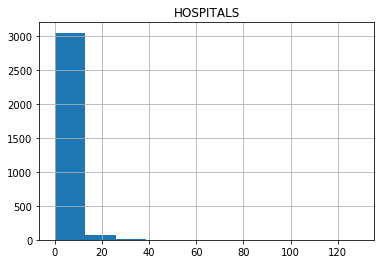

In [8]:
%matplotlib inline
raw_counties_data.hist(column='HOSPITALS')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8d67823d0>]],
      dtype=object)

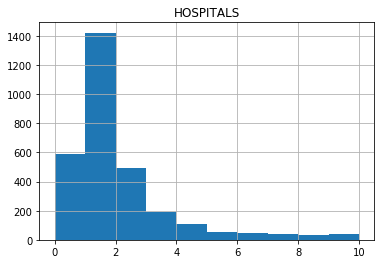

In [9]:
raw_counties_data.loc[raw_counties_data['HOSPITALS'] <= 10].hist(column='HOSPITALS')

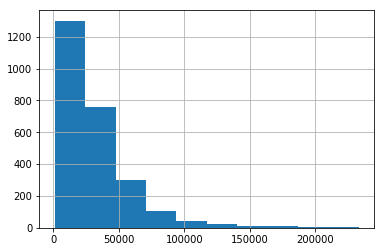

In [10]:
(raw_counties_data['Census'] / raw_counties_data.loc[raw_counties_data['HOSPITALS'] > 0]['HOSPITALS']).hist()